In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bigData_cleaned2.csv', header=0, sep=',') 

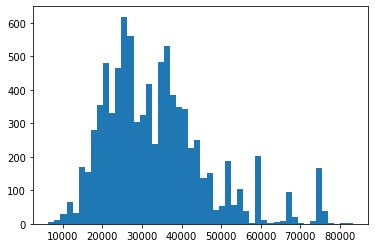

In [3]:
plt.hist(df.attendance, bins=50)
plt.xlabel=("Fare")
plt.ylabel=("Frequency")

In [4]:
#sum(df.attendance>60000)
import seaborn as sns

<AxesSubplot:xlabel='attendance'>

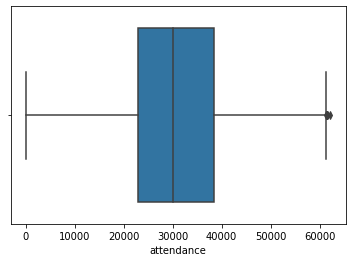

In [14]:
sns.boxplot(df.attendance)

In [6]:
Q1 = np.percentile(df["attendance"], 25)
Q3 = np.percentile(df["attendance"], 75)
IQR = Q3 - Q1

In [7]:
attendance_outlier_rows = df[(df["attendance"] < Q1 - 1.5*IQR) | (df["attendance"] > Q3 + 1.5*IQR )].index

In [8]:
mycols = ["attendance"]
all_outlier_rows = []
for col in mycols:        
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        IQR_range = 1.5 * IQR
        col_outlier = df[(df[col] < Q1 - IQR_range) | 
                              (df[col] > Q3 + IQR_range )].index
        all_outlier_rows.extend(col_outlier)

In [12]:
df.attendance[(df["attendance"] < Q1 - 1.5*IQR) | (df["attendance"] > Q3 + 1.5*IQR )] = (df["attendance"] - df["attendance"].mean()) / df["attendance"].std()

In [15]:
df=df.iloc[:,1:]

In [16]:
df.to_csv('data_no_outliers.csv')